In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
raw_df = pd.read_csv('Zomato Chennai Listing 2020.csv')

In [3]:
raw_df.head()

,Zomato URL,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,https://www.zomato.com/chennai/yaa-mohaideen-b...,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500.0,4.3,1500,4.3,9306,"['Home Delivery', 'Indoor Seating']"
1,https://www.zomato.com/chennai/sukkubhai-biriy...,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000.0,4.4,3059,4.1,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,https://www.zomato.com/chennai/ss-hyderabad-bi...,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500.0,4.3,1361,4.4,10500,"['Home Delivery', 'Indoor Seating']"
3,https://www.zomato.com/chennai/kfc-perambur,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500.0,4.0,1101,4.0,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,https://www.zomato.com/chennai/tasty-kitchen-p...,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450.0,4.2,617,4.1,22400,"['Home Delivery', 'Indoor Seating']"


In [4]:
raw_df.shape

(12032, 12)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zomato URL             12032 non-null  object 
 1   Name of Restaurant     12032 non-null  object 
 2   Address                12032 non-null  object 
 3   Location               12032 non-null  object 
 4   Cuisine                12032 non-null  object 
 5   Top Dishes             12032 non-null  object 
 6   Price for 2            12032 non-null  float64
 7   Dining Rating          6681 non-null   float64
 8   Dining Rating Count    11812 non-null  object 
 9   Delivery Rating        6181 non-null   float64
 10  Delivery Rating Count  11812 non-null  object 
 11  Features               12032 non-null  object 
dtypes: float64(3), object(9)
memory usage: 1.1+ MB


In [6]:
raw_df.describe()

,Price for 2,Dining Rating,Delivery Rating
count,12032.000000,6681.000000,6181.000000
mean,397.611370,3.387756,3.805290
std,332.045938,0.558181,0.374213
min,40.000000,0.300000,0.300000
25%,200.000000,3.100000,3.600000
50%,300.000000,3.500000,3.900000
75%,450.000000,3.800000,4.000000
max,5000.000000,4.900000,4.700000


In [7]:
raw_df.drop(['Zomato URL'], axis = 1, inplace=True)

In [8]:
raw_df.isnull().sum()

Name of Restaurant          0
Address                     0
Location                    0
Cuisine                     0
Top Dishes                  0
Price for 2                 0
Dining Rating            5351
Dining Rating Count       220
Delivery Rating          5851
Delivery Rating Count     220
Features                    0
dtype: int64

In [9]:
raw_df.fillna('NA', inplace=True)

C:\Users\kalas\AppData\Local\Temp\ipykernel_3136\1020279332.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'NA' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.



In [10]:
raw_df.isnull().sum()

Name of Restaurant       0
Address                  0
Location                 0
Cuisine                  0
Top Dishes               0
Price for 2              0
Dining Rating            0
Dining Rating Count      0
Delivery Rating          0
Delivery Rating Count    0
Features                 0
dtype: int64

In [11]:
raw_df[raw_df['Price for 2'].isnull()]

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features


In [12]:
raw_df['Dining Rating Count'].value_counts()

Dining Rating Count
Does not offer Dining        2603
Not enough Dining Reviews    2528
4                             339
5                             271
6                             248
                             ... 
1893                            1
742                             1
1363                            1
1094                            1
1266                            1
Name: count, Length: 794, dtype: int64

In [13]:
raw_df['Dining Rating Count'].replace(to_replace=['NA','Does not offer Dining','Not enough Dining Reviews'], value='0', inplace=True)

C:\Users\kalas\AppData\Local\Temp\ipykernel_3136\1183025856.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [14]:
raw_df['Delivery Rating Count'].value_counts()

Delivery Rating Count
Not enough Delivery Reviews    3379
Does not offer Delivery        2252
NA                              220
27                               34
22                               30
                               ... 
39600                             1
21700                             1
4320                              1
24700                             1
10500                             1
Name: count, Length: 2282, dtype: int64

In [15]:
raw_df['Delivery Rating Count'].replace(to_replace=['NA','Does not offer Delivery','Not enough Delivery Reviews'], value='0', inplace=True)

C:\Users\kalas\AppData\Local\Temp\ipykernel_3136\1114570534.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [16]:
raw_df['Dining Rating'].value_counts()

Dining Rating
NA     5351
3.6     584
3.5     553
3.7     525
3.4     500
3.3     463
3.8     460
3.2     433
3.9     379
3.1     363
2.0     354
3.0     302
4.0     288
2.9     257
4.1     221
2.8     192
4.2     142
2.7     138
4.3     105
2.6      99
2.5      71
4.4      61
2.4      46
4.5      36
2.3      32
2.2      20
4.6      17
4.7      12
2.1      10
4.9       7
4.8       4
1.9       3
1.7       2
0.3       1
1.0       1
Name: count, dtype: int64

In [17]:
raw_df['Dining Rating'].replace(to_replace=['NA'], value='0', inplace=True)

C:\Users\kalas\AppData\Local\Temp\ipykernel_3136\2116547037.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [18]:
raw_df['Delivery Rating'].value_counts()

Delivery Rating
NA     5851
3.9    1383
3.8     701
4.0     570
3.7     559
4.1     468
3.6     465
4.2     401
3.5     314
4.3     277
3.4     259
3.3     189
4.4     128
3.2      93
3.1      79
3.0      63
4.5      55
2.9      39
2.8      26
4.6      24
2.7      19
2.6      17
2.5       9
0.3       8
2.4       7
1.8       5
2.3       5
2.0       5
2.2       5
4.7       4
2.1       2
1.6       1
1.5       1
Name: count, dtype: int64

In [19]:
raw_df['Delivery Rating'].replace(to_replace=['NA'], value='0', inplace=True)

C:\Users\kalas\AppData\Local\Temp\ipykernel_3136\1987233054.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [20]:
raw_df['Price for 2'] = raw_df['Price for 2'].astype('int64')
raw_df['Dining Rating Count'] = raw_df['Dining Rating Count'].astype('int64')
raw_df['Delivery Rating Count'] = raw_df['Delivery Rating Count'].astype('int64')
raw_df['Dining Rating'] = raw_df['Dining Rating'].astype('int64')
raw_df['Delivery Rating'] = raw_df['Delivery Rating'].astype('int64')

In [21]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12032 entries, 0 to 12031
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Name of Restaurant     12032 non-null  object
 1   Address                12032 non-null  object
 2   Location               12032 non-null  object
 3   Cuisine                12032 non-null  object
 4   Top Dishes             12032 non-null  object
 5   Price for 2            12032 non-null  int64 
 6   Dining Rating          12032 non-null  int64 
 7   Dining Rating Count    12032 non-null  int64 
 8   Delivery Rating        12032 non-null  int64 
 9   Delivery Rating Count  12032 non-null  int64 
 10  Features               12032 non-null  object
dtypes: int64(5), object(6)
memory usage: 1.0+ MB


In [22]:
useless_data = (raw_df['Dining Rating'] == 0.0) | (raw_df['Delivery Rating'] == 0.0)
raw_df[useless_data]

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
6,Bai Veetu Kalyanam,"1/187, Thalambur Road, Navallur, Chennai",Navallur,['Biryani'],"['Bread Halwa', ' Mutton Biryani', ' Brinjal G...",350,0,0,4,1061,['Home Delivery']
15,Welcome Hotel,"112/241, Purasawalkam High Road, Purasavakkam...",Purasavakkam,"['South Indian', ' Desserts', ' Beverages']","['Pongal', ' Podi Dosa', ' Idli Sambar', ' Vad...",300,4,1094,0,0,"['Breakfast', 'Vegetarian Only', 'Indoor Seati..."
18,Wire Room Bar & Kitchen,"142, Phoenix Marketcity, New NGO Colony, Vela...","Phoenix Market City, Velachery","['Continental', ' Asian']","['Cocktails', ' Salad', ' Beer', ' Tikka', ' P...",2000,4,354,0,0,"['Full Bar Available', 'Mall Parking', 'Dance ..."
23,BFF 2.0,"80/29, 2nd Main Road, RA Puram, Chennai",RA Puram,"['North Indian', ' Continental', ' Italian']","['Crispy Chicken', ' Cocktails', ' Pizza', ' N...",1500,4,464,0,0,"['Full Bar Available', 'Indoor Seating', 'Nigh..."
77,Al Dhareeq Beef Biriyani,"64/A, 162, Sivan Kovil South Street, Kodambak...",Kodambakkam,['Biryani'],['Beef Biryani'],300,0,0,3,19600,['Home Delivery']
...,...,...,...,...,...,...,...,...,...,...,...
12027,CK's Sandwiches,Delivery Only,Porur,['Sandwich'],Invalid,350,0,0,0,0,"['Breakfast', 'Delivery Only']"
12028,CK's Sandwiches,Delivery Only,Kolathur,['Sandwich'],Invalid,350,0,0,0,0,"['Breakfast', 'Delivery Only']"
12029,CK's Sandwiches,Delivery Only,Anna Nagar East,['Sandwich'],Invalid,350,0,0,0,0,"['Breakfast', 'Delivery Only']"
12030,CK's Sandwiches,Delivery Only,Ramapuram,['Sandwich'],Invalid,350,0,0,0,0,"['Breakfast', 'Delivery Only']"


In [23]:
raw_df = raw_df[~useless_data]

In [24]:
zomato_df = raw_df.copy()

In [25]:
zomato_df.head()

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['Biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500,4,1500,4,9306,"['Home Delivery', 'Indoor Seating']"
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['Biryani', ' North Indian', ' Mughlai', ' Des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4,3059,4,39200,"['Home Delivery', 'Free Parking', 'Table booki..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['Biryani', ' North Indian', ' Chinese', ' Ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4,1361,4,10500,"['Home Delivery', 'Indoor Seating']"
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['Burger', ' Fast Food', ' Finger Food', ' Bev...",['Zinger Burger'],500,4,1101,4,11200,"['Home Delivery', 'Free Parking', 'Card Upon D..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['Chinese', ' Biryani', ' North Indian', ' Che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4,617,4,22400,"['Home Delivery', 'Indoor Seating']"


# Q1) How many restaurants are in Chennai for each type of cuisine?

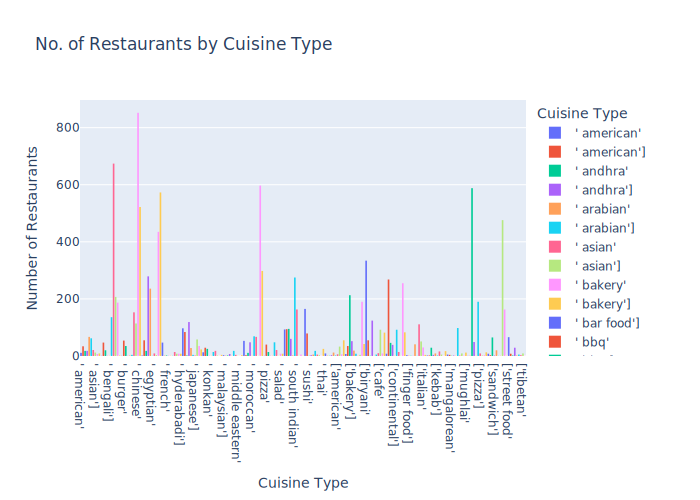

In [26]:
zomato_df['Cuisine'] = zomato_df['Cuisine'].astype(str).str.lower().str.strip()
zomato_df['Cuisine'] = zomato_df['Cuisine'].str.replace(r'\s*,\s*', ', ', regex=True)

zomato_df['Cuisine_List'] = zomato_df['Cuisine'].str.split(', ')
zomato_df_exploded = zomato_df.explode('Cuisine_List')

fig = px.histogram(
    zomato_df_exploded,
    x='Cuisine_List',
    color='Cuisine_List',
    title='No. of Restaurants by Cuisine Type',
    labels={'Cuisine_List': 'Cuisine Type'},
    category_orders={'Cuisine_List': sorted(zomato_df_exploded['Cuisine_List'].unique())}
)
fig.update_layout(xaxis_title='Cuisine Type', yaxis_title='Number of Restaurants')
fig.show()

# Q2) What are the percentage of restaurants by Star Rating in Chennai?

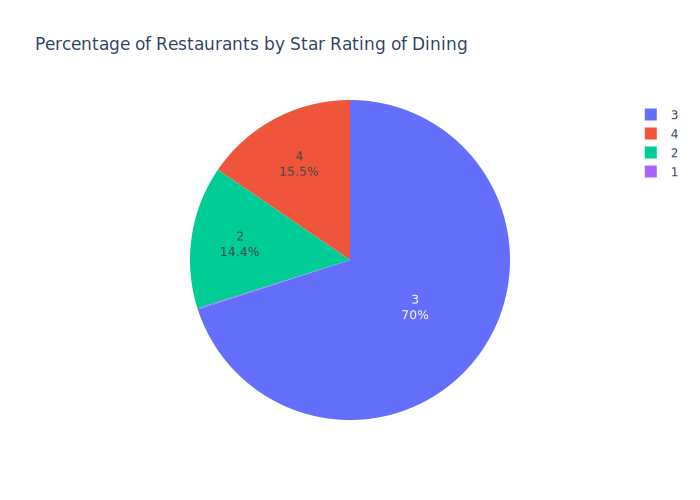

In [27]:
rating_df = zomato_df['Dining Rating'].value_counts().reset_index()
rating_df.rename(columns={'index':'Dining Rating', 'Dining Rating':'Star Rating'}, inplace=True)
rating_df
fig = px.pie(rating_df, names='Star Rating', values='count', color='Star Rating',
 title='Percentage of Restaurants by Star Rating of Dining').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

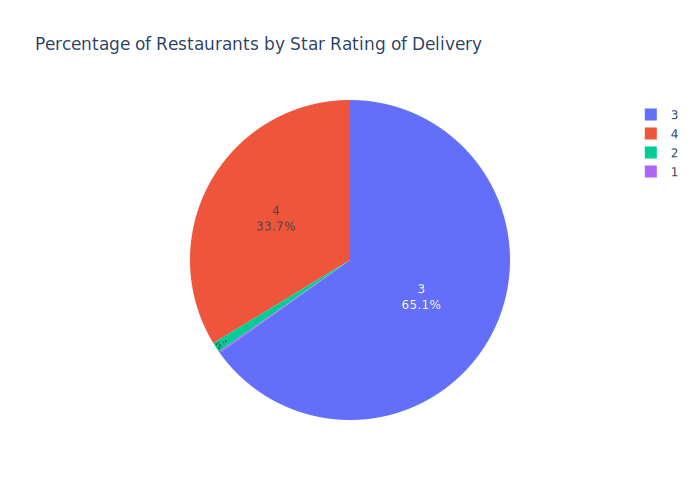

In [28]:
rating_df = zomato_df['Delivery Rating'].value_counts().reset_index()
rating_df.rename(columns={'index':'Delivery Rating', 'Delivery Rating':'Star Rating'}, inplace=True)
rating_df
fig = px.pie(rating_df, names='Star Rating', values='count', color='Star Rating',
 title='Percentage of Restaurants by Star Rating of Delivery').update_traces(textposition='inside', textinfo='percent+label')
fig.show()

# Q3) Which are the Top 10 highest rated Biryani in Chennai?

In [29]:
Biryani_df = zomato_df[zomato_df['Cuisine'].str.contains('biryani')]
Biryani_df['Combined Rating'] = Biryani_df[['Dining Rating', 'Delivery Rating']].mean(axis=1)
Biryani_df.sort_values(by='Combined Rating', ascending=False).head(10)

C:\Users\kalas\AppData\Local\Temp\ipykernel_3136\3110606943.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Cuisine_List,Combined Rating
8879,Dindigul Thalappakatti,"142, Ground Floor, MG Road, Nungambakkam, Che...",Nungambakkam,"['south indian', ' biryani', ' chinese', ' nor...","['Mutton Biryani', ' Chicken Biryani', ' Falud...",900,4,832,4,5199,"['Home Delivery', 'Indoor Seating']","[['south indian', ' biryani', ' chinese', ' no...",4.0
47,Palmshore,"99/59, Pantheon Road, Opposite Museum, Egmore...",Egmore,"['north indian', ' chinese', ' arabian', ' bbq...","['Mutton Mandi', ' Fish', ' Brownie', ' Sea Fo...",1000,4,2162,4,9721,"['Home Delivery', 'Indoor Seating', 'Table boo...","[['north indian', ' chinese', ' arabian', ' bb...",4.0
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['biryani', ' north indian', ' mughlai', ' des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4,3059,4,39200,"['Home Delivery', 'Free Parking', 'Table booki...","[['biryani', ' north indian', ' mughlai', ' de...",4.0
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['biryani', ' north indian', ' chinese', ' ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4,1361,4,10500,"['Home Delivery', 'Indoor Seating']","[['biryani', ' north indian', ' chinese', ' ar...",4.0
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['chinese', ' biryani', ' north indian', ' che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4,617,4,22400,"['Home Delivery', 'Indoor Seating']","[['chinese', ' biryani', ' north indian', ' ch...",4.0
13,Dindigul Thalappakatti,"New 21-A, Arcot Road, Porur, Chennai",Porur,"['south indian', ' biryani', ' chinese', ' nor...","['Mutton Biryani', ' Faluda', ' Barbeque Chick...",900,4,770,4,7670,"['Home Delivery', 'Indoor Seating', 'Table res...","[['south indian', ' biryani', ' chinese', ' no...",4.0
14,Hotel Paramount,"12/5, Ormes Road, Kilpauk, Chennai",Kilpauk,"['north indian', ' chinese', ' seafood', ' sou...","['Biryani', ' Butter Chicken', ' Tandoori Chic...",500,4,1266,4,17700,"['Breakfast', 'Home Delivery', 'Indoor Seating...","[['north indian', ' chinese', ' seafood', ' so...",4.0
551,Royal North Indian,"36/2, NSC Bose Nagar, Pothapedu Main Road, Po...",Porur,"['north indian', ' chinese', ' fast food', ' b...",['Butter Chicken'],400,4,308,4,12300,"['Home Delivery', 'Indoor Seating']","[['north indian', ' chinese', ' fast food', ' ...",4.0
17,Abid's,"21, Spurtank Road, Chetpet, Chennai",Chetpet,"['seafood', ' biryani', ' hyderabadi', ' arabi...","['Haleem', ' Hyderabadi Dum Biryani', ' Brinja...",1200,4,742,4,3020,"['Home Delivery', 'Valet Parking Available', '...","[['seafood', ' biryani', ' hyderabadi', ' arab...",4.0
8880,Dindigul Thalappakatti,"55, Mount Poonamalle High Road, Manapakkam, R...",Ramapuram,"['south indian', ' biryani', ' chinese', ' nor...","['Mutton Biryani', ' Chicken Biryani', ' Tawa ...",900,4,1097,4,4413,"['Home Delivery', 'Indoor Seating', 'Table res...","[['south indian', ' biryani', ' chinese', ' no...",4.0


# Q4) Which is the best Street food in Chennai?

In [30]:
street_food_keywords = ['south indian', 'atho', 'sundal', 'bhajji', 'vadai', 'idly', 'kothu parotta']

street_df =zomato_df[zomato_df['Cuisine'].apply(lambda x: any(keyword in x for keyword in street_food_keywords))].copy()

street_df['Combined Rating'] = street_df[['Dining Rating', 'Delivery Rating']].mean(axis=1)

top_street_food = street_df.sort_values(by='Combined Rating', ascending=False).head(2)

top_street_food

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Cuisine_List,Combined Rating
13,Dindigul Thalappakatti,"New 21-A, Arcot Road, Porur, Chennai",Porur,"['south indian', ' biryani', ' chinese', ' nor...","['Mutton Biryani', ' Faluda', ' Barbeque Chick...",900,4,770,4,7670,"['Home Delivery', 'Indoor Seating', 'Table res...","[['south indian', ' biryani', ' chinese', ' no...",4.0
14,Hotel Paramount,"12/5, Ormes Road, Kilpauk, Chennai",Kilpauk,"['north indian', ' chinese', ' seafood', ' sou...","['Biryani', ' Butter Chicken', ' Tandoori Chic...",500,4,1266,4,17700,"['Breakfast', 'Home Delivery', 'Indoor Seating...","[['north indian', ' chinese', ' seafood', ' so...",4.0


# Q5) Which places have the highest rated restaurant for each Cuisine in Chennai?

In [31]:
highest_rated_df = zomato_df['Cuisine']
highest_rated_df ['Combined Rating'] = zomato_df[['Dining Rating', 'Delivery Rating']].mean(axis=1)
highest_rated_df = zomato_df[highest_rated_df ['Combined Rating'] >= 4]
highest_rated_df

C:\Users\kalas\AppData\Local\Temp\ipykernel_3136\3966364564.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Cuisine_List
0,Yaa Mohaideen Briyani,"336 & 338, Main Road, Pallavaram, Chennai",Pallavaram,['biryani'],"['Bread Halwa', ' Chicken 65', ' Mutton Biryan...",500,4,1500,4,9306,"['Home Delivery', 'Indoor Seating']",[['biryani']]
1,Sukkubhai Biriyani,"New 14, Old 11/3Q, Railway Station Road, MKN ...",Alandur,"['biryani', ' north indian', ' mughlai', ' des...","['Beef Biryani', ' Beef Fry', ' Paratha', ' Pa...",1000,4,3059,4,39200,"['Home Delivery', 'Free Parking', 'Table booki...","[['biryani', ' north indian', ' mughlai', ' de..."
2,SS Hyderabad Biryani,"98/339, Arcot Road, Opposite Gokulam Chit Fun...",Kodambakkam,"['biryani', ' north indian', ' chinese', ' ara...","['Brinjal Curry', ' Tandoori Chicken', ' Chick...",500,4,1361,4,10500,"['Home Delivery', 'Indoor Seating']","[['biryani', ' north indian', ' chinese', ' ar..."
3,KFC,"10, Periyar Nagar, 70 Feet Road, Near Sheeba ...",Perambur,"['burger', ' fast food', ' finger food', ' bev...",['Zinger Burger'],500,4,1101,4,11200,"['Home Delivery', 'Free Parking', 'Card Upon D...","[['burger', ' fast food', ' finger food', ' be..."
4,Tasty Kitchen,"135B, SRP Colony, Peravallur, Near Perambur, ...",Perambur,"['chinese', ' biryani', ' north indian', ' che...","['Mutton Biryani', ' Chicken Rice', ' Tomato R...",450,4,617,4,22400,"['Home Delivery', 'Indoor Seating']","[['chinese', ' biryani', ' north indian', ' ch..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9960,Ibaco,"302/A, G.S.T. Road, Crompet, Chennai",Chromepet,['ice cream'],['Icecream Cake'],200,4,109,4,349,"['Home Delivery', 'Vegetarian Only', 'Indoor S...",[['ice cream']]
10028,Creamy Inn,"W 578, School Road, Anna Nagar West, Chennai",Anna Nagar West,"['ice cream', ' desserts', ' beverages']","['Waffles', ' Thick Shakes']",250,4,224,4,708,"['Home Delivery', 'Vegetarian Only', 'Indoor S...","[['ice cream', ' desserts', ' beverages']]"
10063,Cold Stone Creamery,"Plot 1, Gentle Tides, East Coast Road, Injamb...",Akkarai,"['desserts', ' ice cream']",Invalid,500,4,169,4,296,"['Home Delivery', 'Vegetarian Only', 'Indoor S...","[['desserts', ' ice cream']]"
10066,Pizza Republic,"25, Kamaraj Street, Near Repco Home Finance.,...",Tambaram,['pizza'],"['Pizza', ' Garlic Bread', ' Salad', ' Pasta']",500,4,209,4,912,"['Home Delivery', 'Indoor Seating']",[['pizza']]


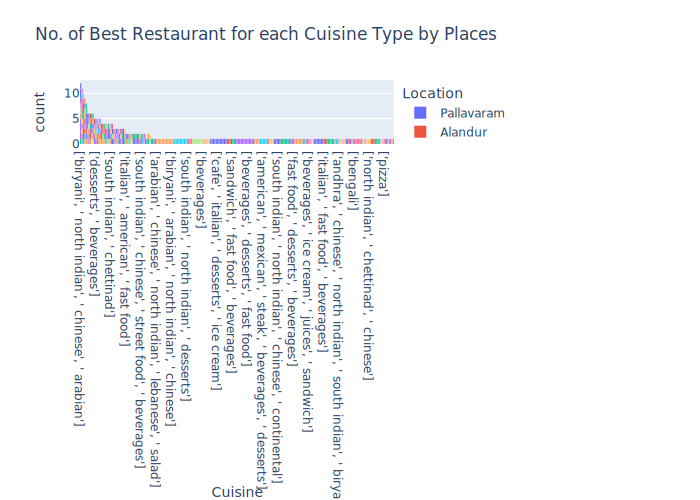

In [32]:
fig = px.histogram(highest_rated_df, x='Cuisine', color='Location',
title= 'No. of Best Restaurant for each Cuisine Type by Places').update_xaxes(categoryorder="total descending")
fig.show()

# Q6) What is the Avg Price Distibution of highest rated restaurant for each Cuisine Type in Chennai?

In [33]:
highest_rated_price_df = highest_rated_df.groupby(by=['Location', 'Cuisine'])['Price for 2'].mean().reset_index()
highest_rated_price_df.head()

,Location,Cuisine,Price for 2
0,Adambakkam,"['biryani', ' fast food', ' bbq']",300.0
1,Adyar,"['bakery', ' fast food', ' sandwich', ' desser...",250.0
2,Adyar,"['beverages', ' desserts']",350.0
3,Adyar,"['cafe', ' italian', ' european']",800.0
4,Adyar,"['chinese', ' thai']",800.0


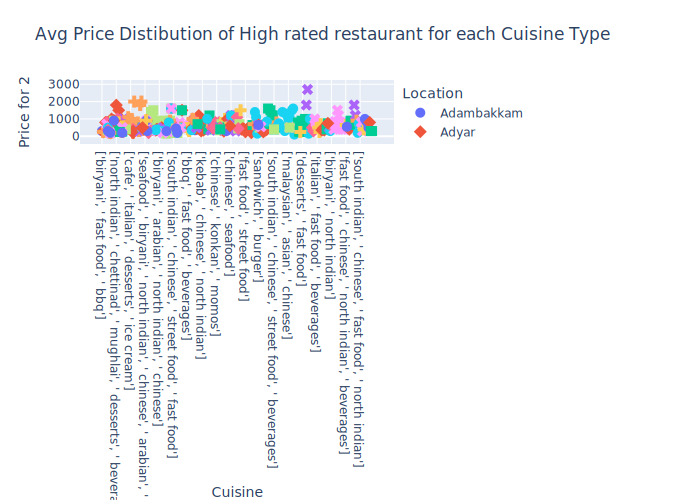

In [34]:
fig = px.scatter(highest_rated_price_df, x="Cuisine", y="Price for 2", color="Location", symbol="Location",
 title=' Avg Price Distibution of High rated restaurant for each Cuisine Type').update_traces(marker_size=10)
fig.show()

# Q7) Which areas have a large number of Chinese Restaurant Market?

In [35]:
zomato_df['Cuisine'] =zomato_df['Cuisine'].astype(str).str.lower().str.strip()
zomato_df['Location'] = zomato_df['Location'].astype(str).str.strip()

chinese_df = zomato_df[zomato_df['Cuisine'].str.contains('chinese', na=False)]
location_counts = chinese_df['Location'].value_counts().reset_index()
location_counts.columns = ['Location', 'Chinese_Restaurant_Count']
top_chinese_areas = location_counts.head(10)
print(top_chinese_areas)

          Location  Chinese_Restaurant_Count
0            Porur                        58
1  Anna Nagar East                        57
2         Ambattur                        52
3         T. Nagar                        47
4        Velachery                        46
5         Kolathur                        45
6         Perambur                        45
7        Ramapuram                        43
8       Medavakkam                        42
9     Thuraipakkam                        41


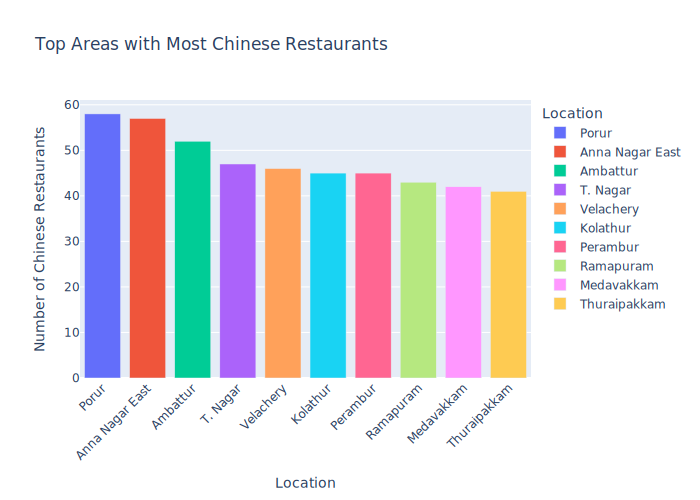

In [36]:
fig = px.bar(
    top_chinese_areas,
    x='Location',
    y='Chinese_Restaurant_Count',
    title='Top Areas with Most Chinese Restaurants',
    labels={'Chinese_Restaurant_Count': 'Number of Chinese Restaurants'},
    color='Location'
)
fig.update_layout(xaxis_tickangle=-45)
fig.show()

# Q8) Is there a relation between Price and Rating by each Cuisine?

In [37]:
price_rating_df = zomato_df.groupby(['Cuisine', 'Dining Rating', 'Delivery Rating'])['Price for 2'].mean().reset_index()
price_rating_df

,Cuisine,Dining Rating,Delivery Rating,Price for 2
0,"['american', ' continental', ' european', ' it...",3,3,700.0
1,"['american', ' continental', ' italian', ' nor...",4,3,800.0
2,"['american', ' continental']",4,3,1600.0
3,"['american', ' fast food']",2,3,300.0
4,"['american', ' fast food']",3,3,500.0
...,...,...,...,...
1978,"['tibetan', ' chinese']",3,3,450.0
1979,"['tibetan', ' chinese']",4,3,350.0
1980,"['tibetan', ' momos']",3,3,400.0
1981,"['tibetan', ' momos']",3,4,400.0


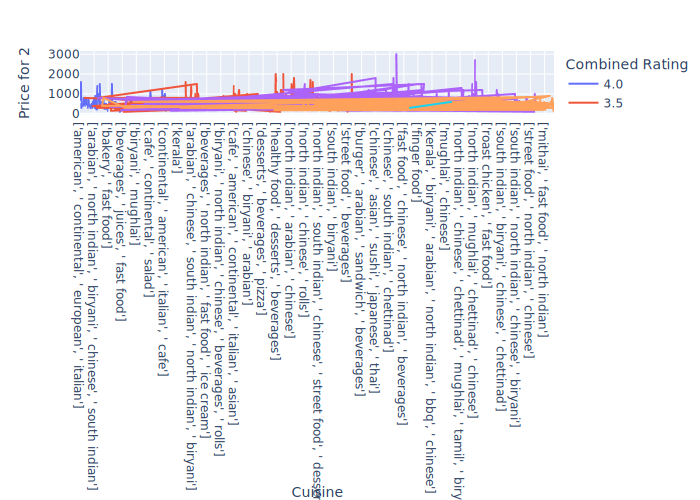

In [38]:
price_rating_df ['Combined Rating'] = zomato_df[['Dining Rating', 'Delivery Rating']].mean(axis=1)
fig = px.line(price_rating_df, y="Price for 2", x="Cuisine",color='Combined Rating')
fig.show()

# Q9) Is there a relation between Region and Price?

In [39]:
region_price_df = zomato_df.groupby(['Location'])['Price for 2'].mean().reset_index()
region_price_df

,Location,Price for 2
0,Abhiramapuram,200.000000
1,Adambakkam,327.631579
2,Adyar,528.865979
3,Akkarai,575.000000
4,Alandur,442.857143
...,...,...
156,Vepery,347.368421
157,Vettuvankeni,475.000000
158,Virugambakkam,422.000000
159,Washermenpet,380.555556


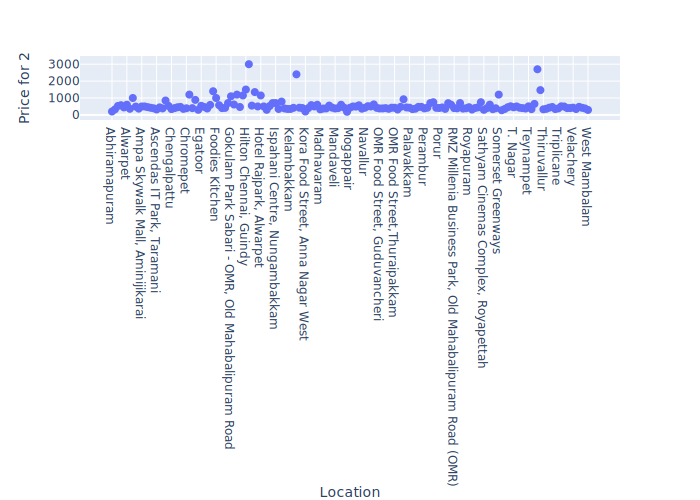

In [40]:
fig = px.scatter(region_price_df, x="Location", y="Price for 2").update_traces(marker_size=8)
fig.show()

# Q10) Find the list of Affordable Restaurants?

In [41]:
max_price = zomato_df['Price for 2'].max()
one_fourth_price = max_price/4
one_fourth_price

np.float64(750.0)

In [42]:
affordable_threshold = 750

affordable_df = zomato_df[zomato_df['Price for 2'] <= affordable_threshold].copy()

affordable_df['Dining Rating'] = pd.to_numeric(zomato_df['Dining Rating'], errors='coerce')
affordable_df['Delivery Rating'] = pd.to_numeric(zomato_df['Delivery Rating'], errors='coerce')
affordable_df['Combined Rating'] = affordable_df[['Dining Rating', 'Delivery Rating']].mean(axis=1)

top_affordable = affordable_df.sort_values(by=['Price for 2', 'Combined Rating'], ascending=[True, False])
top_affordable

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Cuisine_List,Combined Rating
108,Rayar's Mess,"31, Arundale Street, Mylapore, Chennai",Mylapore,['south indian'],"['Pongal', ' Vada', ' Filtered Coffee', ' Idli...",100,4,904,4,1319,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",[['south indian']],4.0
754,90ML,"6, Mahalingapuram Main Road, Kamdar Nagar, Nu...",Nungambakkam,"['tea', ' coffee']","['Ginger Tea', ' Filtered Coffee', ' Masala Te...",100,4,173,4,429,"['Home Delivery', 'Outdoor Seating']","[['tea', ' coffee']]",4.0
1326,Madurai Famous Jigarthanda,"Shop 52, Mothilal Street, Opposite Ranganatha...",T. Nagar,"['beverages', ' ice cream']",Invalid,100,3,105,4,815,"['Home Delivery', 'Indoor Seating']","[['beverages', ' ice cream']]",3.5
1518,Lassi Junction,"9A, Thirumangalam road, Navalar Nagar, Near N...",Anna Nagar West,"['beverages', ' ice cream']",Invalid,100,3,95,4,2761,"['Home Delivery', 'Outdoor Seating']","[['beverages', ' ice cream']]",3.5
1679,Hyderabadi Irani Chai,"OMR Food Street, Guduvancheri, GST Road, Chennai","OMR Food Street, Guduvancheri","['beverages', ' fast food', ' street food']",Invalid,100,3,78,4,814,"['Home Delivery', 'Outdoor Seating']","[['beverages', ' fast food', ' street food']]",3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9465,Aasife & Brothers Biriyani Centre,"5/98, Opposite Cantonment Marriage Hall, St. ...",St. Thomas Mount,"['north indian', ' chinese', ' seafood']","['Chicken 65', ' Chicken Biryani', ' Chicken L...",750,2,210,3,1857,"['Home Delivery', 'Indoor Seating', 'Table Res...","[['north indian', ' chinese', ' seafood']]",2.5
9568,Ponnusamy Hotels,"305A, Rajiv Gandhi Salai, Opposite Satyam Sof...",Sholinganallur,"['chettinad', ' south indian', ' chinese']","['Fish Finger', ' Mutton Biryani', ' Butter Na...",750,2,236,3,1443,"['Home Delivery', 'Indoor Seating', 'Table res...","[['chettinad', ' south indian', ' chinese']]",2.5
9571,Ponnusamy Hotels,"23/22, Royal Building, Mount Road, Little Mou...",Saidapet,"['chettinad', ' south indian', ' chinese']","['Fish Finger', ' Chicken 65', ' Chilli Chicke...",750,2,126,3,489,"['Home Delivery', 'Table booking recommended',...","[['chettinad', ' south indian', ' chinese']]",2.5
9577,Ponnusamy Hotels,"3rd Floor, AMPA Skywalk, Nelson Manickam Road...",Aminijikarai,"['north indian', ' chettinad', ' chinese', ' b...",Invalid,750,2,15,3,118,"['Home Delivery', 'Indoor Seating']","[['north indian', ' chettinad', ' chinese', ' ...",2.5


# Q11) Find the list of most Reliable Restaurants?

In [43]:
zomato_df['Reliability Score'] = zomato_df [['Dining Rating', 'Delivery Rating']].mean(axis=1)
top_reliable = zomato_df.sort_values(by='Reliability Score', ascending=False)
top_reliable

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Cuisine_List,Reliability Score
1149,Sandwich Hub By Anika Foods,"Old 11/1, New 8, Halls Road, Kilpauk, Chennai",Kilpauk,"['fast food', ' street food']","['Maggi', ' Sandwich', ' Cheese Shot', ' Noodle']",300,4,162,4,1266,"['Home Delivery', 'Vegetarian Only', 'Indoor S...","[['fast food', ' street food']]",4.0
9279,Gastronomer By Double Roti,"4/27, Cenotaph, 1st Street, Teynampet, Chennai",Teynampet,"['cafe', ' american', ' fast food']","['Burgers', ' Fries', ' Oreo Shake', ' Healthy...",900,4,2341,4,2577,"['Home Delivery', 'Indoor Seating', 'Wifi']","[['cafe', ' american', ' fast food']]",4.0
370,The Kandyan,"13, 3rd Avenue, Sai Ram Colony, Besant Nagar...",Besant Nagar,"['north indian', ' south indian', ' sri lankan...","['Chicken Curry', ' Bhindi Fry', ' Butter Chic...",450,4,482,4,1704,"['Home Delivery', 'Indoor Seating', 'Table boo...","[['north indian', ' south indian', ' sri lanka...",4.0
25,Salem RR Briyani Unavagam,"166, 100 Feet Road, Ganapathi Nagar, Velacher...",Velachery,"['biryani', ' chinese', ' north indian', ' sea...","['Chicken 65', ' Mutton Biryani', ' Tandoori C...",550,4,1180,4,1717,"['Home Delivery', 'Indoor Seating', 'Catering ...","[['biryani', ' chinese', ' north indian', ' se...",4.0
40,Krishna's Dosa Kadai,"40, Nolambur, Phase - 1, Mogappair, Chennai",Mogappair,"['south indian', ' north indian', ' andhra', '...","['Pizza Dosa', ' Butter Naan', ' Coffee', ' Ch...",350,4,692,4,34600,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...","[['south indian', ' north indian', ' andhra', ...",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10698,Sri Krishna Sweets,"A-7, Industrial Estate, Chennai, Guindy, Chennai",Guindy,"['mithai', ' street food']",Invalid,250,2,0,1,0,"['Home Delivery', 'Vegetarian Only', 'Indoor S...","[['mithai', ' street food']]",1.5
9643,Parfait Cakes And Bakes,Delivery Only,Kolathur,"['bakery', ' continental', ' fast food', ' des...",Invalid,600,2,0,1,0,"['Delivery Only', 'Desserts and Bakes']","[['bakery', ' continental', ' fast food', ' de...",1.5
10225,Aazhi - The Sea Food Mess,Delivery Only,Medavakkam,"['south indian', ' biryani']",Invalid,400,1,0,1,12,['Delivery Only'],"[['south indian', ' biryani']]",1.0
10223,Aazhi - The Sea Food Mess,Delivery Only,Egatoor,"['south indian', ' biryani']",Invalid,400,1,0,1,4,['Delivery Only'],"[['south indian', ' biryani']]",1.0


# Q11) Find the list of most Reliable,high rating and affordable Restaurants?

In [44]:
zomato_df['Reliability Score'] = zomato_df[['Dining Rating', 'Delivery Rating']].mean(axis=1)

rating_threshold = 4.0
price_threshold = 750


filtered_df = zomato_df[
    (zomato_df['Reliability Score'] >= rating_threshold) &
    (zomato_df['Price for 2'] <= price_threshold)
]


top_combined = filtered_df.sort_values(by=['Reliability Score', 'Price for 2'], ascending=[False, True])
top_combined

,Name of Restaurant,Address,Location,Cuisine,Top Dishes,Price for 2,Dining Rating,Dining Rating Count,Delivery Rating,Delivery Rating Count,Features,Cuisine_List,Reliability Score
108,Rayar's Mess,"31, Arundale Street, Mylapore, Chennai",Mylapore,['south indian'],"['Pongal', ' Vada', ' Filtered Coffee', ' Idli...",100,4,904,4,1319,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...",[['south indian']],4.0
754,90ML,"6, Mahalingapuram Main Road, Kamdar Nagar, Nu...",Nungambakkam,"['tea', ' coffee']","['Ginger Tea', ' Filtered Coffee', ' Masala Te...",100,4,173,4,429,"['Home Delivery', 'Outdoor Seating']","[['tea', ' coffee']]",4.0
1087,Cakes and Berrys,"195, Mount Poonamallee Road, Porur, Chennai",Porur,['bakery'],"['Paneer Roll', ' Chocolate Truffle Cake', ' B...",150,4,140,4,649,"['Home Delivery', 'Indoor Seating', 'Desserts ...",[['bakery']],4.0
1219,Waffle Cart,"C 30/193, 2nd Street, 11th Main Road, AE Bloc...",Anna Nagar East,['desserts'],"['Death By Chocolate', ' Coffee', ' Kitkat Waf...",150,4,113,4,90,"['Home Delivery', 'Desserts and Bakes', 'Indoo...",[['desserts']],4.0
9338,Royal Sandwich Shop,"Shop 1, Old 52, New 2, Panni Amman, Kovil Str...",Kotturpuram,"['fast food', ' desserts', ' beverages']","['Pizza Sandwich', ' Blue Lagoon', ' Noodle', ...",150,4,318,4,905,"['Home Delivery', 'Indoor Seating']","[['fast food', ' desserts', ' beverages']]",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,Pandia's Avenue,"114, SN Chetty Street, Kalmandapam, Royapuram...",Royapuram,"['north indian', ' chinese', ' biryani', ' sou...","['Faluda', ' Biryani', ' Paratha', ' Chicken 6...",750,4,419,4,6757,"['Home Delivery', 'Table booking recommended',...","[['north indian', ' chinese', ' biryani', ' so...",4.0
427,Al Souk,"31, Cochin House, Anderson Road, Nungambakkam...",Nungambakkam,"['arabian', ' lebanese', ' middle eastern', ' ...","['Baklava', ' Pita Bread', ' Hot Mezze Platter...",750,4,244,4,147,"['Home Delivery', 'Indoor Seating', 'Table boo...","[['arabian', ' lebanese', ' middle eastern', '...",4.0
8817,Savoury Sea Shell,"55, Ali Tower, Greams Road, Opposite IDBI Ban...",Thousand Lights,"['chinese', ' bbq', ' south indian']","['Chicken Grill', ' Shawarma', ' Bbq Chicken',...",750,4,825,4,7485,"['Home Delivery', 'Indoor Seating', 'Table boo...","[['chinese', ' bbq', ' south indian']]",4.0
8830,Sangeetha's Desi Mane,"23/35,10th Avenue, Ashok Nagar, Chennai",Ashok Nagar,"['south indian', ' north indian', ' chinese', ...","['Faluda', ' Paneer Tikka', ' Coffee', ' Curd ...",750,4,514,4,10400,"['Breakfast', 'Home Delivery', 'Vegetarian Onl...","[['south indian', ' north indian', ' chinese',...",4.0
